# Biopython Basics

## Applications :

<div class="alert alert-block alert-info">
    
- **Sequence Analysis** (DNA/RNA/Protein)<br><br>
    
- **Transcription** & **translation studies**<br><br>
    
- Quering & accessing **Bioinformatics Databases**<br>
a. **Entrez**<br>
b. **PDB**<br>
c. **Genbank**<br><br>

- 3D **structure** analysis
</div>

## 1. Install modules & packages

In [1]:
# !pip install pandas
# !pip install nglview
# !pip install biopython
# !pip install matplotlib
# !conda install -c rmg py3dmol -y
# !pip install dna_features_viewer

In [2]:
import Bio
import heapq
import pylab
import urllib
import py3Dmol
import pandas as pd
import nglview as nv
from Bio.Seq import Seq
from Bio.Blast import NCBIWWW
from Bio.Alphabet import IUPAC
from collections import Counter
from Bio.Data import CodonTable
from Bio import SeqIO, SearchIO, Entrez
from Bio.PDB import PDBParser,MMCIFParser
from Bio.SeqUtils import GC,molecular_weight
from dna_features_viewer import GraphicFeature, GraphicRecord
from Bio.Alphabet import generic_dna,generic_rna,generic_protein

In [3]:
# Attributes of Biopython
dir(Bio)

['Align',
 'Alphabet',
 'BiopythonDeprecationWarning',
 'BiopythonExperimentalWarning',
 'BiopythonParserWarning',
 'BiopythonWarning',
 'Blast',
 'Data',
 'Entrez',
 'File',
 'GenBank',
 'MissingExternalDependencyError',
 'MissingPythonDependencyError',
 'PDB',
 'SVDSuperimposer',
 'SearchIO',
 'Seq',
 'SeqFeature',
 'SeqIO',
 'SeqRecord',
 'SeqUtils',
 'Sequencing',
 'StreamModeError',
 'SwissProt',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_parent_dir',
 'os',
 'warnings']

## 2. Sequence analysis

In [4]:
# dir(Seq)

In [5]:
# DNA sequence

dna = Seq('ATATATATAGCGCGCGCGCTCTCTCGGAGAGAGAGAGGCGCGGCGCGCGCGCTTCTCTGAGA')
dna

Seq('ATATATATAGCGCGCGCGCTCTCTCGGAGAGAGAGAGGCGCGGCGCGCGCGCTT...AGA')

In [6]:
# identify the type
type(dna)

Bio.Seq.Seq

In [7]:
# converting sequence to string
type(str(dna))

str

In [8]:
# converting sequence to alphabet
type(dna.alphabet)

Bio.Alphabet.Alphabet

2.1. Alphabet Types
--
<div class="alert alert-block alert-success">
- generic_dna/rna<br>
- generic_proteins<br>
- IUPACUnambiguousDNA (provides basic letters)<br>
- IUPACAmbiguousDNA (provides for ambiguity letters for every possible situation)
</div>

    
Use cases of Alphabets
--

<div class="alert alert-block alert-info">
- To identify the type of information contained by within a sequence object<br>
- provides a mean of constraining the information<br>
- facilitates sequence checking.<br>
</div>

In [9]:
seq1 = Seq('atgagtcagcagacatcagacgacg', generic_dna)
seq2 = Seq('auauagcgccucgcgcggcgcauau', generic_rna)
seq3 = Seq('atattatagcacacagacaggatct', IUPAC.unambiguous_dna)

In [10]:
seq1.alphabet

DNAAlphabet()

In [11]:
seq2.alphabet

RNAAlphabet()

In [12]:
seq3.alphabet

IUPACUnambiguousDNA()

## 3. Sequence Manipulation<br>
<div class="alert alert-block alert-success">
- indexing/slicing<br>
- concatination<br>
- codon search<br>
- GC content<br>
- complement<br>
- transcription<br>
- translation
</div>

In [13]:
dna_seq = Seq('ATATATATAGCGCGCGCGCTCTCTCGGAGAGAGAGAGGCGCGGCGCGCGCGCTTCTCTGAGA',generic_dna)

In [14]:
# Indexing / slicing
dna_seq[0:2]

Seq('AT', DNAAlphabet())

In [15]:
# concatination
dna_seq2 = Seq('cgcgcgtatattagaccagagcaca',generic_dna)

dna_seq[0:4] + dna_seq2[0:4]

Seq('ATATcgcg', DNAAlphabet())

In [16]:
# codon search
dna_seq.find('G')

9

In [17]:
dna_seq.find('AGA')

27

In [18]:
# codon count
dna_seq.count('T')

11

In [19]:
# GC content
(dna_seq.count('G') + dna_seq.count('C'))/(len(dna_seq)) * 100

62.903225806451616

<center><b>OR </b></center>

In [20]:
GC(dna_seq)

62.903225806451616

In [21]:
# complement & reverse complement

comp1 = dna_seq[0:10]
comp2 = dna_seq[0:10].complement()
comp3 = dna_seq[0:10].reverse_complement()

print(f" \
sequence           = {comp1}\n \
complement         = {comp2}\n \
reverse complement = {comp3}")

 sequence           = ATATATATAG
 complement         = TATATATATC
 reverse complement = CTATATATAT


In [22]:
# Calculating molecular weight of the sequence

molecular_weight(dna_seq)

19281.2389

## 3.1 Transcription & Translation

<div class="alert alert-block alert-info">
- DNA > mRNA = transcription<br>
- mRNA > amino acid = translation
</div>

In [23]:
mRNA = dna_seq.transcribe()
mRNA[:10]

Seq('AUAUAUAUAG', RNAAlphabet())

In [24]:
protein = mRNA.translate()
protein[-10:]

C:\Users\hunak\anaconda3\lib\site-packages\Bio\Seq.py:2738: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('ERGAARALL*', HasStopCodon(ExtendedIUPACProtein(), '*'))

In [25]:
# change symbol for stop codon
mRNA.translate(stop_symbol = '$')[-10:]

Seq('ERGAARALL$', HasStopCodon(ExtendedIUPACProtein(), '$'))

In [26]:
# reverse transcription

mRNA.back_transcribe()[:10]

Seq('ATATATATAG', DNAAlphabet())

### Can protein sequences be reverse translated ?
<div class="alert alert-block alert-info">
<b>Note</b> : there is no function called `back_translate` so we'll make use of `back_transcribe`.
</div>

In [27]:
protein.back_transcribe()

ValueError: Proteins cannot be back transcribed!

### This error is true for all the biological life on earth too...
<div class="alert alert-block alert-warning">
- we can't perform an exact "reverse translation" of course, since several amino acids are produced by the same codon. Note that if instead we started with the nucleotide sequence, then we could use Biopython's .transcribe() and .translate() functions to convert sequences from DNA to RNA and DNA to protein respectively.
</div>

## 3.1.1. Custom translation

In [28]:
# function to translate any input sequence of any length

translation_table = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M', 
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T', 
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K', 
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',                  
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L', 
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P', 
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q', 
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R', 
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V', 
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A', 
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E', 
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G', 
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S', 
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L', 
    'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_', 
    'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W', 
}

def translate(seq):
    '''
        translates sequence using the `translation_table`
    '''
    protein = ''
    if len(seq)%3 == 0:
        for i in range(0,len(seq),3):
            codon = seq[i:i+3]
            protein += translation_table[codon]
    return protein
    
    

In [29]:
translate('ATCGATCTCTGA')

'IDL_'

## 3.1.2. Builtin codon table

### Unambiguous DNA

In [30]:
print(CodonTable.unambiguous_dna_by_name['Standard'])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

### Unambiguous RNA

In [31]:
print(CodonTable.unambiguous_rna_by_name['Standard'])

Table 1 Standard, SGC0

  |  U      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
U | UUU F   | UCU S   | UAU Y   | UGU C   | U
U | UUC F   | UCC S   | UAC Y   | UGC C   | C
U | UUA L   | UCA S   | UAA Stop| UGA Stop| A
U | UUG L(s)| UCG S   | UAG Stop| UGG W   | G
--+---------+---------+---------+---------+--
C | CUU L   | CCU P   | CAU H   | CGU R   | U
C | CUC L   | CCC P   | CAC H   | CGC R   | C
C | CUA L   | CCA P   | CAA Q   | CGA R   | A
C | CUG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | AUU I   | ACU T   | AAU N   | AGU S   | U
A | AUC I   | ACC T   | AAC N   | AGC S   | C
A | AUA I   | ACA T   | AAA K   | AGA R   | A
A | AUG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GUU V   | GCU A   | GAU D   | GGU G   | U
G | GUC V   | GCC A   | GAC D   | GGC G   | C
G | GUA V   | GCA A   | GAA E   | GGA G   | A
G | GUG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [32]:
# dir(CodonTable)

## 4. Handling Sequence data (FASTA File)

In [33]:
# Loading FASTA file
seq_file = SeqIO.read("Data/sequence.fasta", "fasta")

## 4.1.  Sequence details

In [34]:
type(seq_file)

Bio.SeqRecord.SeqRecord

In [35]:
# list sequence details
for record in SeqIO.parse("Data/sequence.fasta","fasta"):
    print(record)

ID: MN908947.3
Name: MN908947.3
Description: MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet())


In [36]:
# list individula features
for record in SeqIO.parse("Data/sequence.fasta","fasta"):
    print(record.id)
    print(record.description)

MN908947.3
MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome


In [37]:
# store sequence for later analysis

seqfromfile = seq_file.seq
seqfromfile

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet())

### We can now perform `transcription` , `translation` or GC content calculation with this sequence as shown above.

In [94]:
len(seqfromfile)

29903

In [95]:
protein_seq = seqfromfile.translate()

In [96]:
len(protein_seq)

9967

In [75]:
# Listing the most common amino acids

common_amino = Counter(protein_seq)
common_amino.most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

In [85]:
del common_amino['*']

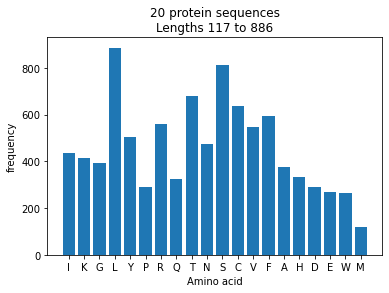

In [83]:
pylab.bar(common_amino.keys(),common_amino.values())

pylab.title("%i protein sequences\nLengths %i to %i" 
            % (len(common_amino.values()), 
               min(common_amino.values()), 
               max(common_amino.values())))

pylab.xlabel("Amino acid")
pylab.ylabel("frequency")
pylab.show()

### Since stop codon * signifies end of a protein we can split the sequence using ( * )

In [42]:
protein_list = [str(i) for i in protein_seq.split('*')]
protein_list[:10]

['IKGLYLPR',
 'QTNQLSISCRSVL',
 'TNFKICVAVTRLHA',
 'CTHAV',
 'LITNYCR',
 'QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER',
 'DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS',
 'RWHLWLSRS',
 'KRRFAST',
 'TALCVHQTFGCSNCTSWSCYG']

In [43]:
# listing proteins greater than a given length

large_proteins = [x for x in protein_list if len(x)> 10]
len(large_proteins)

190

In [44]:
# convert sequences to dataframe

df = pd.DataFrame({'protein_seq':large_proteins})
df.head()

,protein_seq
0,QTNQLSISCRSVL
1,TNFKICVAVTRLHA
2,QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER
3,DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS
4,TALCVHQTFGCSNCTSWSCYG


In [45]:
# add a new column with length
df['length'] = df['protein_seq'].apply(len)
df.head()

,protein_seq,length
0,QTNQLSISCRSVL,13
1,TNFKICVAVTRLHA,14
2,QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER,35
3,DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS,46
4,TALCVHQTFGCSNCTSWSCYG,21


In [98]:
# # plot to visualise protein sequences based on length
# pylab.hist(df.length, bins=20)
# pylab.title("%i protein sequences\nLengths %i to %i" \
#             % (len(df.length), 
#                min(df.length), 
#                max(df.length)))
# pylab.xlabel("Sequence length (bp)")
# pylab.ylabel("Count")
# pylab.show()

In [99]:
#sort based on legth
df.sort_values(by = ['length'], ascending = False)[:10]

,protein_seq,length
118,CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFL...,2701
157,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...,290
168,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,123
158,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...,83
167,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,63
3,DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS,46
93,TMLRCYFPKCSEKNNQGYTPLVVTHNFDFTFSFSPEYSMVFVLFFV,46
188,KSHHIFTEATRSTIECTVNNARESCLYGRALMCKINFSSAIPM,43
116,DVVYTHWYWSGNNSYTGSQYGSRILWWCIVLSVLPLPHRSSKS,43
182,LQTLAANCTICPQRFSVLRNVAHWHGSHTFGNVVDLHRCHQIG,43


<CENTER><B>
    OR
    </B></CENTER>

In [100]:
df.nlargest(10,'length')

,protein_seq,length
118,CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFL...,2701
157,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...,290
168,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,123
158,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...,83
167,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,63
3,DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS,46
93,TMLRCYFPKCSEKNNQGYTPLVVTHNFDFTFSFSPEYSMVFVLFFV,46
116,DVVYTHWYWSGNNSYTGSQYGSRILWWCIVLSVLPLPHRSSKS,43
182,LQTLAANCTICPQRFSVLRNVAHWHGSHTFGNVVDLHRCHQIG,43
188,KSHHIFTEATRSTIECTVNNARESCLYGRALMCKINFSSAIPM,43


## 5. Basic local alignment using NCBI-BLAST

In [101]:
# let's take a single protein from the table

one_large_protein = df.nlargest(1,'length')
single_prot = one_large_protein.iloc[0,0]

# write to a file
with open("Data/single_seq.fasta","w") as file:
    file.write(">unknown \n"+single_prot)

In [102]:
from Bio import SeqIO
read = SeqIO.read("single_seq.fasta", "fasta")
read.seq

Seq('CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQ...VNN', SingleLetterAlphabet())

In [103]:
%%time
# based on the internet speed this query might take 2-5 minutes to run
result_handle = NCBIWWW.qblast("blastp","pdb",read.seq)

Wall time: 1min 6s


In [104]:
blast_qresult = SearchIO.read(result_handle, "blast-xml")

In [105]:
print(blast_qresult)

Program: blastp (2.10.1+)
  Query: unnamed (2701)
         protein product
 Target: pdb
   Hits: ----  -----  ----------------------------------------------------------
            #  # HSP  ID + description
         ----  -----  ----------------------------------------------------------
            0      1  pdb|6YYT|A  Chain A, nsp12 [Severe acute respiratory sy...
            1      1  pdb|6XEZ|A  Chain A, nsp12 [Severe acute respiratory sy...
            2      1  pdb|7BW4|A  Chain A, nsp12 [Severe acute respiratory sy...
            3      1  pdb|6X2G|A  Chain A, RNA-directed RNA polymerase [Sever...
            4      1  pdb|7BV1|A  Chain A, nsp12 [Severe acute respiratory sy...
            5      1  pdb|7C2K|A  Chain A, RNA-directed RNA polymerase [Sever...
            6      1  pdb|6M71|A  Chain A, SARS-Cov-2 NSP 12 [Severe acute re...
            7      1  pdb|6NUR|A  Chain A, NSP12 [Severe acute respiratory sy...
            8      1  pdb|6ZSL|A  Chain A, SARS-CoV-2 helicase 

In [106]:
#fetch the id, description, evalue, bitscore & alignment of first hit
seqid = blast_qresult[0]
details = seqid[0]
print(f"\
Sequence ID:{seqid.id}\n\
description:{seqid.description}\n\
E value:    {details.evalue} \n\
Bit Score:  {details.bitscore}\n\
")

Sequence ID:pdb|6YYT|A
description:Chain A, nsp12 [Severe acute respiratory syndrome coronavirus 2]
E value:    0.0 
Bit Score:  1938.31



In [107]:
print(f"alignment:\n{details.aln}")

alignment:
ProteinAlphabet() alignment with 2 rows and 925 columns
FKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKT...VLQ unnamed
LNRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKT...VLQ pdb|6YYT|A


In [108]:
pdbid = seqid.id.split('|')[1]
pdbid

'6YYT'

## Optional

## 5.1. Entrez

In [109]:
Entrez.email = "yourmail@email.com"

In [110]:
entrez_record = Entrez.efetch(db="protein", id=seqid.id,
                       retmode="txt", rettype="gb")
genbank_record = SeqIO.read(entrez_record,"genbank")

C:\Users\hunak\anaconda3\lib\site-packages\Bio\GenBank\__init__.py:1139: BiopythonParserWarning: Dropping bond qualifier in feature location
  warnings.warn(


In [111]:
with open("Data/genbank_record.txt","w") as gb:
    gb.write(str(genbank_record))

#### There's a lot of information in the genbank record if you know where to find it...

<div class="alert alert-block alert-warning">
<b>0. Is it single or double stranded and a DNA or RNA ?</b> In case of DNA

In [112]:
# IN CASE OF DNA
#       genbank_record.annotations["molecule"])

<div class="alert alert-block alert-warning">
<b>1. What is the full NCBI taxonomy of this virus?

In [113]:
genbank_record.annotations["taxonomy"]

['Viruses',
 'Riboviria',
 'Orthornavirae',
 'Pisuviricota',
 'Pisoniviricetes',
 'Nidovirales',
 'Cornidovirineae',
 'Coronaviridae',
 'Orthocoronavirinae',
 'Betacoronavirus',
 'Sarbecovirus']

<div class="alert alert-block alert-warning">
<b>2. What are the relevant references/labs who generated the data?

In [114]:
for reference in genbank_record.annotations["references"]:
    print(reference)

location: [0:935]
authors: Hillen,H.S., Kokic,G., Farnung,L., Dienemann,C., Tegunov,D. and Cramer,P.
title: Structure of replicating SARS-CoV-2 polymerase
journal: Nature (2020) In press
medline id: 
pubmed id: 32438371
comment: Publication Status: Available-Online prior to print

location: [0:935]
authors: Hillen,H.S., Kokic,G., Farnung,L., Dienemann,C., Tegunov,D. and Cramer,P.
title: Direct Submission
journal: Submitted (06-MAY-2020)
medline id: 
pubmed id: 
comment: 



<div class="alert alert-block alert-warning">
<b>3. Retrieve the protein coding sequences (CDSs) from the Genbank record </b>(in case of DNA)
    <br><br><center><em><b>OR</b></em></center><br>
<b>3. Retrive the features of the protein</b>(in case of Protein)

In [115]:
# number of features
len(genbank_record.features)

75

In [116]:
#list features
{feature.type for feature in genbank_record.features}

{'Het', 'Region', 'SecStr', 'Site', 'source'}

In [117]:
# finding the CDS
# CDSs = [feature for feature in genbank_record.features if feature.type == "CDS"]
# len(CDSs)

In [118]:
# listing the gene
# CDSs[0].qualifiers["gene"]

In [119]:
# hunting for it's protein
# protein_seq = Seq(CDSs[0].qualifiers["translation"][0])

<div class="alert alert-block alert-warning">
<b>4. Does the protein sequence start with a "start codon" ?

In [120]:
genbank_record.seq.startswith("M")

False

In [121]:
print(CodonTable.unambiguous_dna_by_id[1])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

## 5.2. Sequence visualisation

- [DNA features viewer](https://github.com/Edinburgh-Genome-Foundry/DnaFeaturesViewer) allows to plot nucleotide or amino acid sequences under the record plot:

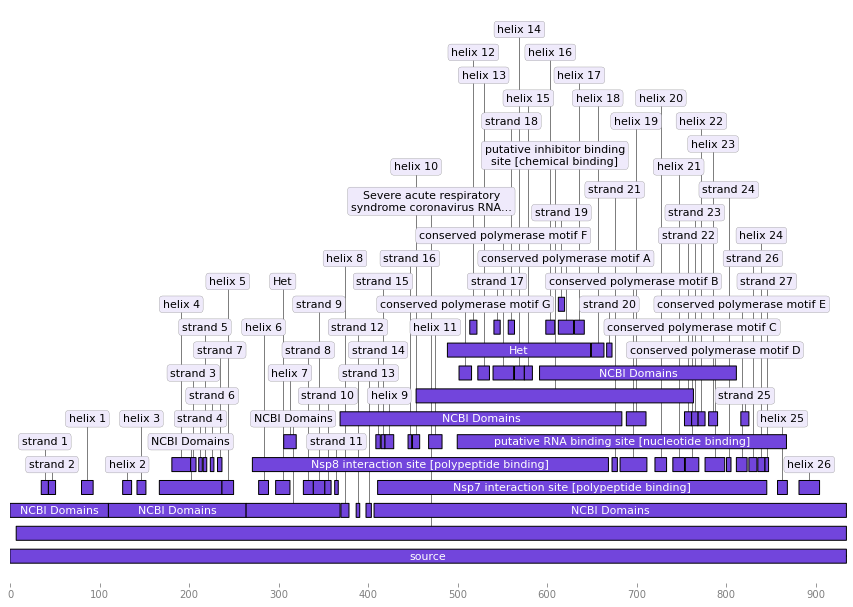

In [147]:
from dna_features_viewer import BiopythonTranslator

graphic_record = BiopythonTranslator().translate_record(genbank_record)

plot = graphic_record.plot(figure_width=15,
                            strand_in_label_threshold=5)

In [149]:
# plot

#### This enables for instance to plot an overview of a sequence along with a detailed detail of a sequence subsegment

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'GC(%)')

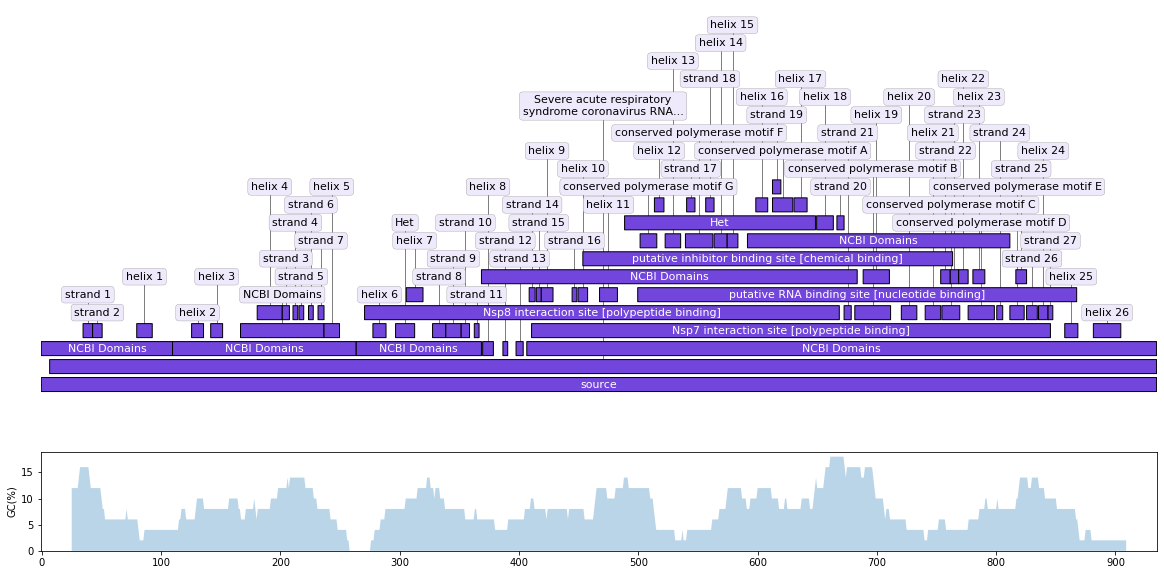

In [123]:
# Incase of DNA

# from Bio.SeqRecord import SeqRecord
# import matplotlib.pyplot as plt
# from Bio import SeqIO
# import numpy as np

from dna_features_viewer import BiopythonTranslator


fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(20, 10), sharex=True, gridspec_kw={"height_ratios": [4, 1]}
)

# PLOT THE RECORD MAP
# record = SeqIO.read(entrez_record,"genbank")

record = genbank_record 
graphic_record = BiopythonTranslator().translate_record(record)
graphic_record.plot(ax=ax1, with_ruler=False,
                    strand_in_label_threshold=4)

# PLOT THE LOCAL GC CONTENT (we use 50bp windows)

gc = lambda s: 100.0 * len([c for c in s if c in "GC"]) / 50

xx = np.arange(len(record.seq) - 50)
yy = [gc(record.seq[x : x + 50]) for x in xx]
ax2.fill_between(xx + 25, yy, alpha=0.3)
ax2.set_ylim(bottom=0)
ax2.set_ylabel("GC(%)")

## 6. 3D structure visualisation of proteins

#### Inorder to visualise the protein we need to fetch the pdb file from pdb database

#### We'll use `PDBParser` & `MMCIFParser` for this purpose

## 6.1. retreiving PDB structure from RCSB-PDB

In [124]:
# link format https://files.rcsb.org/download/6YYT.pdb

urllib.request.urlretrieve('https://files.rcsb.org/download/6YYT.pdb',
                           'Data/6YYT.pdb')

('6YYT.pdb', <http.client.HTTPMessage at 0x1686c2ca790>)

## 6.2. Reading the PDB structure

In [125]:
parser = PDBParser()
structure = parser.get_structure("6YYT","Data/6YYT.pdb")

C:\Users\hunak\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12058.
  warnings.warn(


In [126]:
structure

<Structure id=6YYT>

## 6.2.1. Identifying the number of chains & atoms

In [127]:
for chain in structure[0]:
    print(f"chain: {chain}, chainid: {chain.id}")

chain: <Chain id=A>, chainid: A
chain: <Chain id=B>, chainid: B
chain: <Chain id=C>, chainid: C
chain: <Chain id=D>, chainid: D
chain: <Chain id=P>, chainid: P
chain: <Chain id=Q>, chainid: Q
chain: <Chain id=T>, chainid: T
chain: <Chain id=U>, chainid: U


In [128]:
# Check the atoms

for model in structure:
    print(model)
    for chain in model:
        print(chain)
#         for residue in chain:
#             for atom in residue:
#                 print(atom)

<Model id=0>
<Chain id=A>
<Chain id=B>
<Chain id=C>
<Chain id=D>
<Chain id=P>
<Chain id=Q>
<Chain id=T>
<Chain id=U>


## 6.3. Visualising Protein structure

#### we'll make use of `nglview` & `py3dmol`

## 6.3.1. `nglview`

In [129]:
nv.demo()

NGLWidget()

In [130]:
view1 = nv.show_biopython(structure)
view1

NGLWidget()

## 6.3.1.2 capturing the current posture

In [131]:
view1.render_image()

Image(value=b'', width='99%')

## 6.3.2. `py3Dmol`

In [132]:
view2 = py3Dmol.view(query='pdb:6YYT')

In [133]:
view2.setStyle({
    'cartoon':{'color':'spectrum'}
})

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [134]:
view2.display_image()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## BONUS

- listing modules in the current jupyter notebook
- exporting the list of modules used in the current notebook to .txt file

In [135]:
# Listing currently used packages

import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())

['builtins',
 'builtins',
 'pyforest._importable',
 'pyforest.user_specific_imports',
 'pyforest._imports',
 'pandas',
 'pyforest.utils',
 'pyforest',
 'Bio',
 'heapq',
 'pylab',
 'urllib',
 'py3Dmol',
 'nglview',
 'Bio.Blast.NCBIWWW',
 'Bio.Alphabet.IUPAC',
 'Bio.Data.CodonTable',
 'Bio.SeqIO',
 'Bio.SearchIO',
 'Bio.Entrez',
 'types']

In [136]:
# writing package names to a file

with open("requirements.txt","w") as req:
    req.write(str(list(imports())))


## Reference:
1. http://biopython.org/DIST/docs/tutorial/Tutorial.html
2. https://krother.gitbooks.io/biopython-tutorial/content/first_steps.html
3. https://www.rcsb.org/pdb/software/static.do?p=/software/webservices/search_nmr.jsp
4. https://www.ncbi.nlm.nih.gov/books/NBK25499/#chapter4.EFetch
4. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6031024/
5. https://github.com/Edinburgh-Genome-Foundry/DnaFeaturesViewer